In [ ]:
import numpy as np
import os
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Exploración

In [2]:
housing = pd.read_excel("housing.xlsx")

In [3]:
# En lo siguiente se observa algo interesesante y es que es en la característica total_bedrooms
# hay algunos datos nulos 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
len(housing.columns)

10

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaf637e8d0>,
      dtype=object)

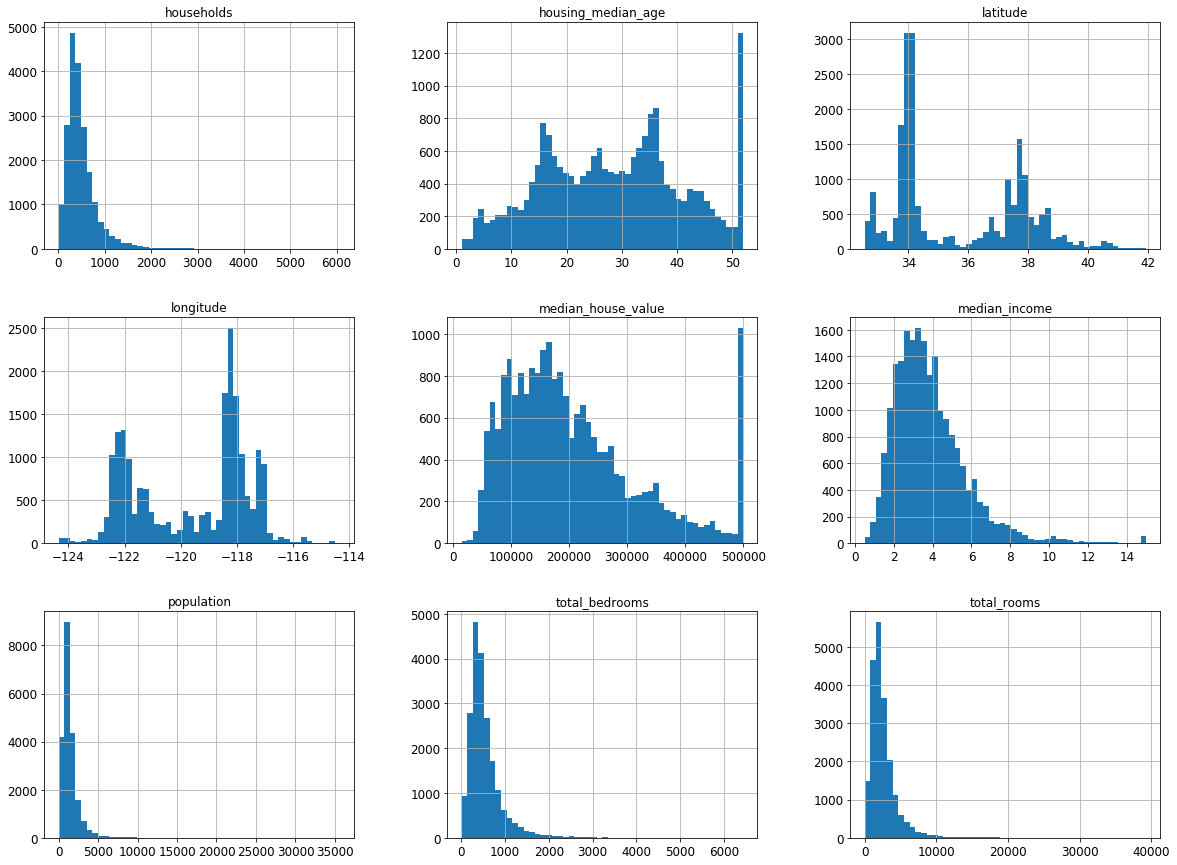

In [7]:
housing.hist(bins = 50, figsize=(20, 15))

In [9]:
"""def split_train_test(data, test_radio):
    
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_radio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]
"""

#df_train, df_test = train_test_split
#split_train_test(housing, 0.2)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [10]:
housing_with_id = housing.reset_index()

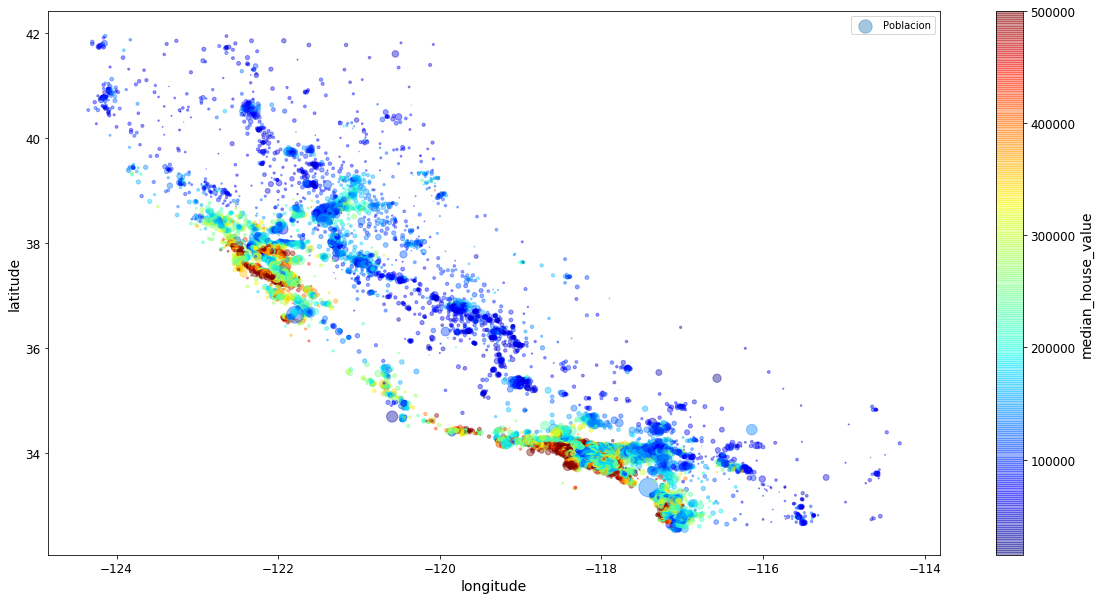

In [18]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha= 0.4, s=housing["population"]/100, 
             label = "Poblacion", c = "median_house_value",cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False, figsize=(20, 10))

In [41]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ubication             0.104524
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaeb9a8898>,
      dtype=object)

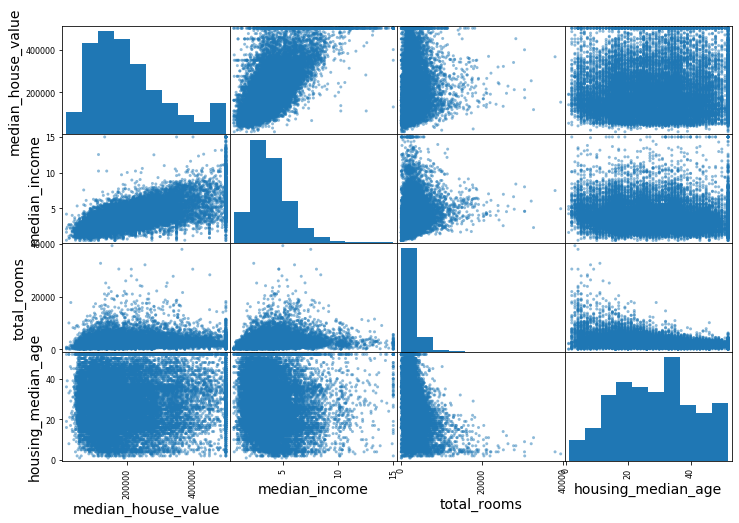

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize =  (12, 8))

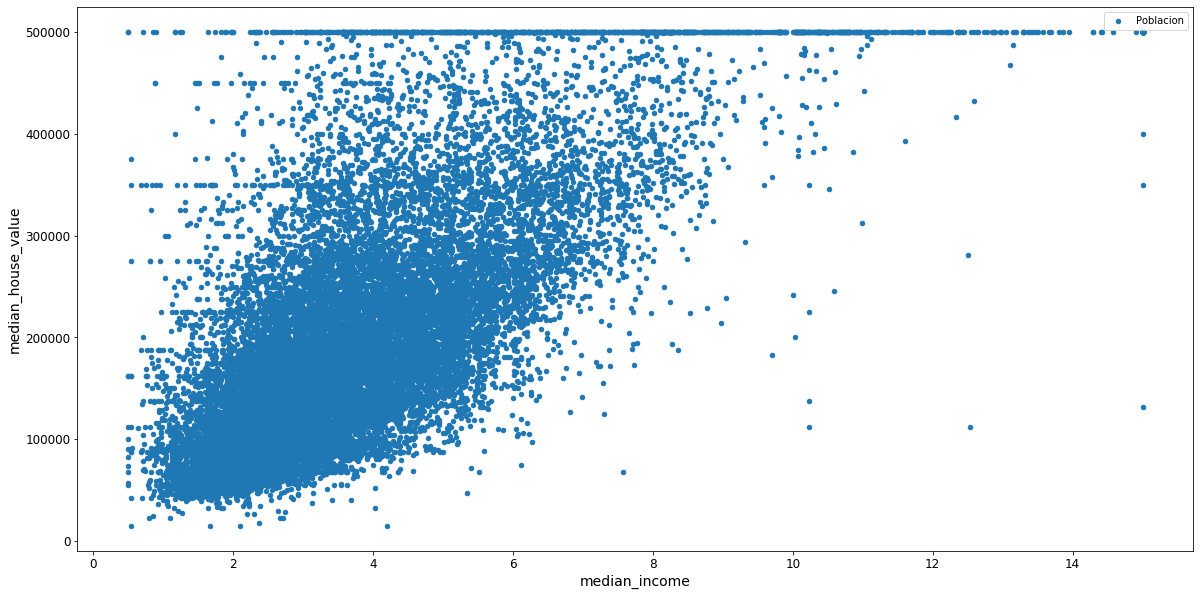

In [38]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha= 1, 
             label = "Poblacion", figsize=(20, 10))

In [44]:
housing['rooms_per_household'] = housing["total_rooms"]/housing["households"]
housing['bedrooms_per_room'] = housing["total_bedrooms"]/housing["total_rooms"]
housing['population_per_household'] = housing["population"]/housing["households"]

In [45]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
ubication                   0.104524
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Limpieza de datos

{'whiskers': [<matplotlib.lines.Line2D at 0x7feaeae83ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x7feaeae912b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feaeae83898>],
 'medians': [<matplotlib.lines.Line2D at 0x7feaeae91940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feaeae91c88>],
 'means': []}

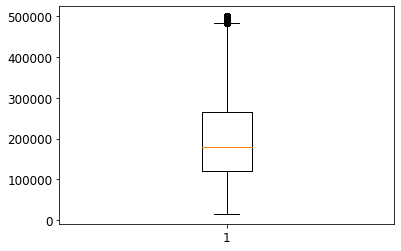

In [39]:
plt.boxplot(housing.median_house_value)

In [ ]:
variables = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']

In [ ]:
housing.columns

**Sesgo por espionaje:** 

In [ ]:
# 
housing[housing.total_bedrooms.isna()] = housing.total_bedrooms.mean()

In [ ]:
X = housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
             'total_bedrooms', 'population', 'households', 'median_income']]

y = housing['median_house_value']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)